# Gender Bias in Llama 3.2 3b

This notebook documents the results of our gender bias study, including proportional gender distributions by profession and corresponding statistical analyses. We tested the hypothesis that female and male pronouns have the same probability of appearing in the output across professions.

In [ ]:
from IPython.display import Image, display, HTML
import os
import pandas as pd

## Bias

The gender assignment probabilities across professions reveal substantial deviations from the 50% parity baseline. For doctors, only 7.0% of instances are assigned the female gender, indicating a strong male skew approaching a deterministic stereotype. For nurses, 35.0% of assignments are female, reflecting a smaller but still significant deviation from parity, with a Gender Bias of −15.0% toward male. Although both professions exhibit bias in the same direction, the magnitude differs markedly. Overall, the model shows a tendency to default to one gender across professions, suggesting the presence of a global gender bias rather than purely profession-specific effects.

In [ ]:
bias = pd.DataFrame({
    "Professions": ["Nurse", "Doctor"],
    "Gender Bias": [0.27, -0.36],
    "Probabilities": [0.77, 0.14]
})

# Display as HTML table
display(HTML(bias.to_html(index=False, border=1, justify='center')))

## Proportions and CIs

In our experiment, gender bias is present in the language model's outputs for certain professions, with female pronouns appearing much more frequently for nurses than for doctors.

In [ ]:
df = pd.DataFrame({
    "profession": ["doctor", "nurse"],
    "Female (%)": [7.0, 35.3],
    "CI Female": ["[6.5, 7.5]", "[34.4, 36.3]"],
    "Male (%)": [43.0, 10.5],
    "CI Male": ["[42.1, 44.0]", "[9.9, 11.1]"]
})

display(HTML(df.to_html(index=False)))

The next figure illustrates the observed gender proportions including only male and female assignments, unknown categories are excluded to ensure comparability with the tabulated results. By visually aligning the observed proportions with the 50.0\% benchmark, the figure emphasizes both the magnitude and direction of systematic gender biases across professions, while the inclusion of confidence intervals provides a clear measure of robustness against stochastic variation.

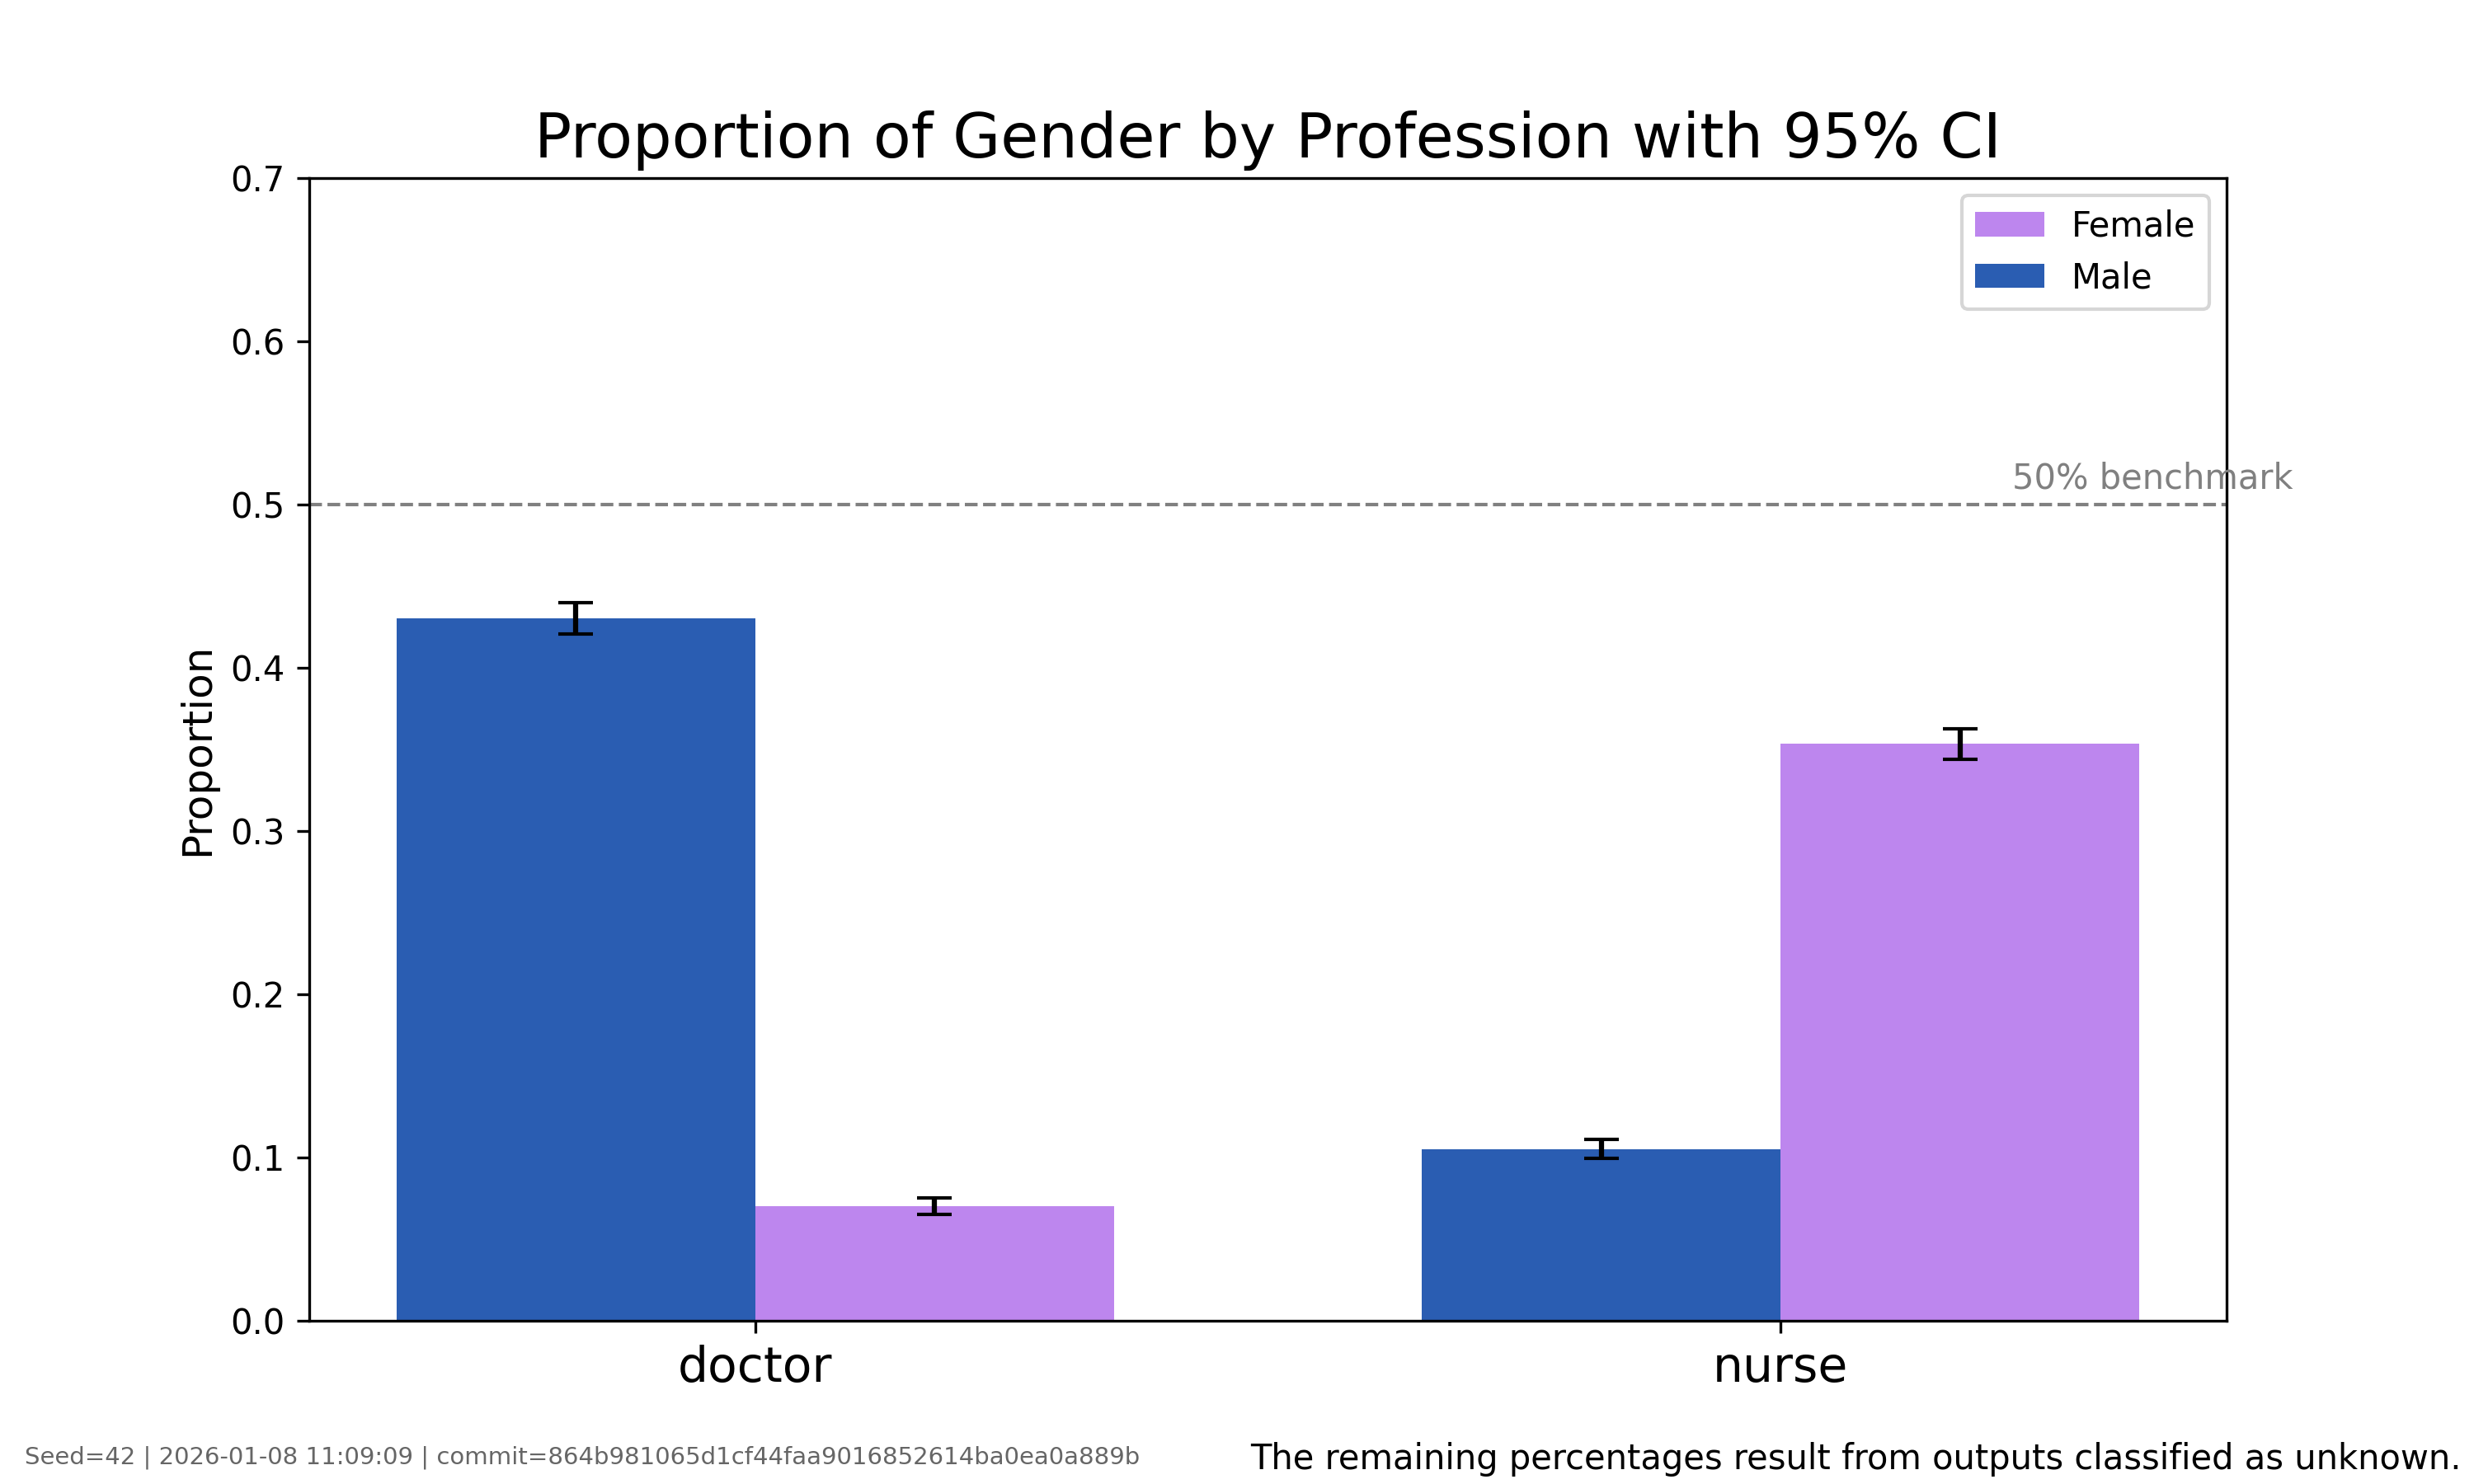

In [60]:
os.chdir('../figures')
display(Image(filename="proportion_by_profession_ci.png"))


## Odds and Statistical Tests

In [59]:
odds = pd.DataFrame({
    "Profession": ["Nurse", "Doctor"],
    "Female": [3534, 704],
    "Male": [1053, 4304],
    "Odds of Female": [3.36, 0.16],
    "Chi-Square": [3879.75, 3879.75],
    "Odds Ratio": [20.52, 20.52]
})

display(HTML(odds.to_html(index=False, border=1, justify='center')))

Profession,Female,Male,Odds of Female,Chi-Square,Odds Ratio
Nurse,3534,1053,3.36,3879.75,20.52
Doctor,704,4304,0.16,3879.75,20.52


## Gender Proportion with unkowns

The next figure reflects the raw model outputs and are not normalized. They include stochastic variation, as indicated by the approximate 50\% noise inherent in model predictions. This non-baselined approach ensures that observed biases are not artificially reduced, but also introduces variability around parity that should be interpreted with caution.

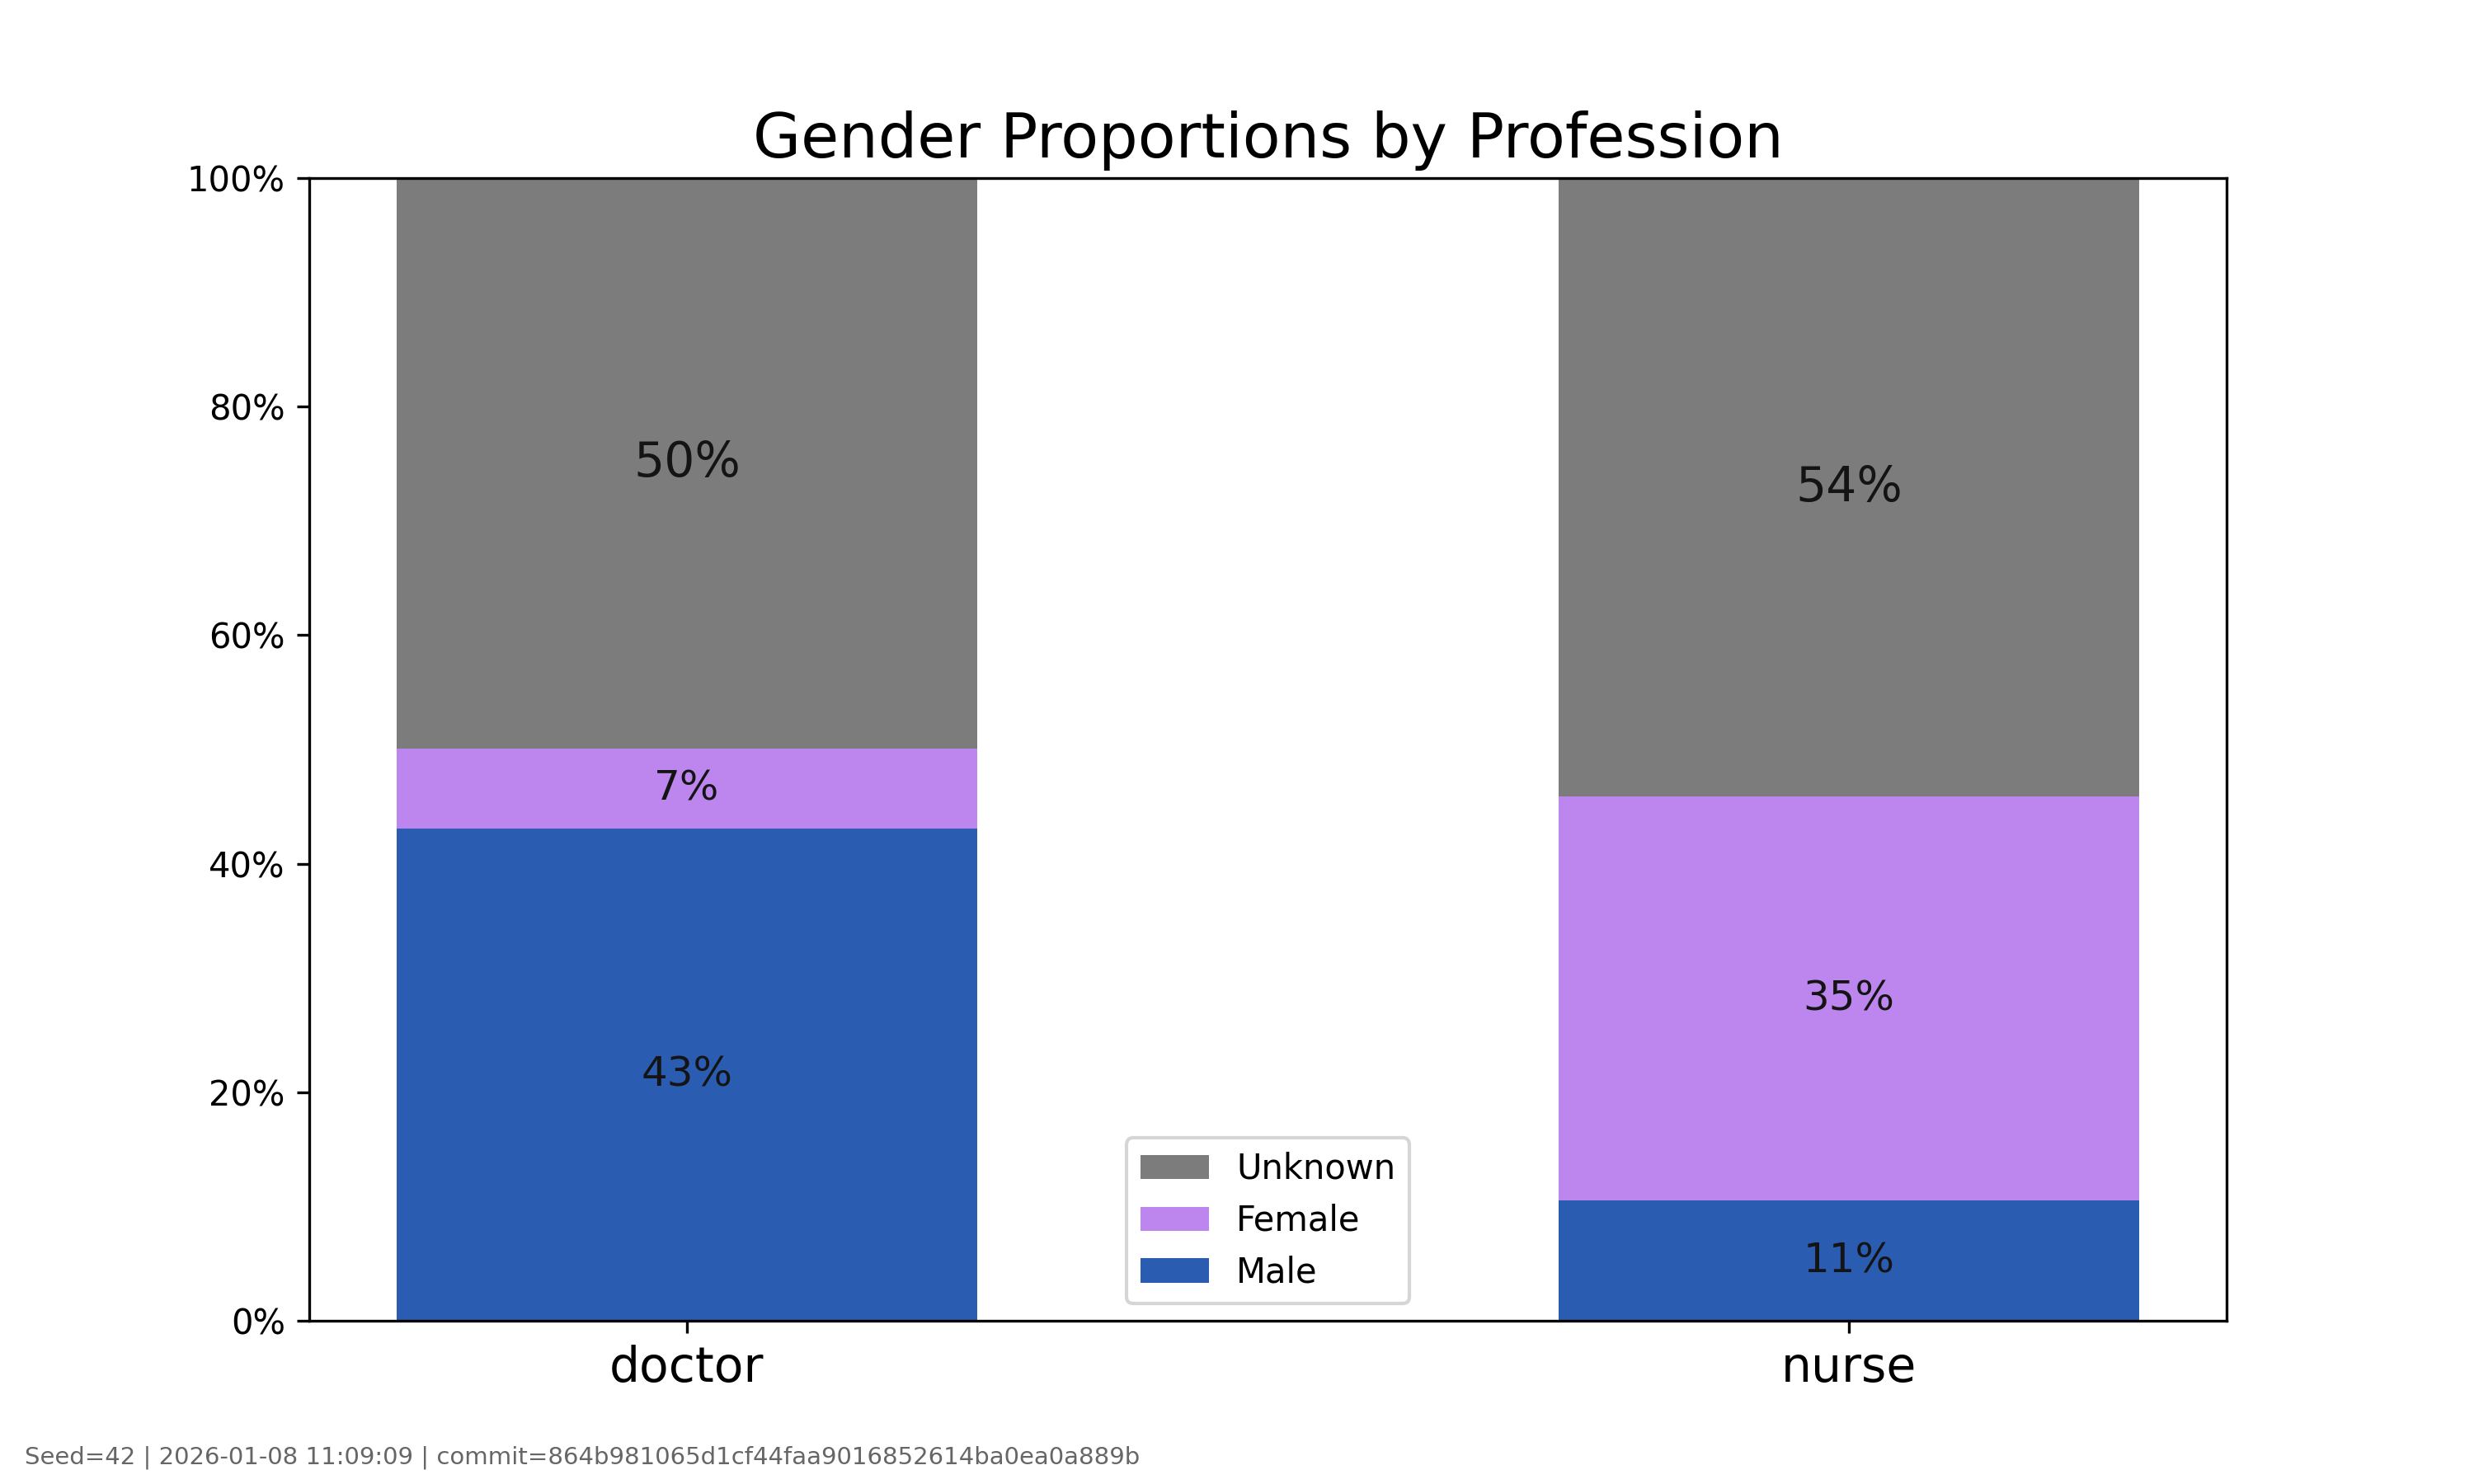

In [58]:
os.chdir('../figures')
display(Image(filename="proportion_by_profession_bar.png"))